*There are no recommended prerequisites for this notebook.*

In [ ]:
# package imports (SHIFT + ENTER to run)
import json
from astroquery.simbad import Simbad
from astropy.table import vstack
import matplotlib.pyplot as plt
import numpy as np
from pyvo import registry  # version >=1.6
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# dev note : needs proofreading
# dev note : needs beta testing

# Microlensing eras
This notebook is **part 4** of an introductory bundle, meant to be consumed sequentially, according to this outline:

<h3>Contents</h3>

- [What is microlensing?](Introduction.ipynb#what-is-microlensing) ([part 1](Introduction.ipynb))

- [What is it used for?](Introduction.ipynb#what-is-it-used-for)

  - [Exoplanets](PlanetsAndBrownDwarfs.ipynb#exoplanets) ([part 2](PlanetsAndBrownDwarfs.ipynb))

  - [Brown dwarfs](PlanetsAndBrownDwarfs.ipynb#brown-dwarfs)

  - [Black holes and other remnants](RemnantsAndDarkMatter.ipynb#black-holes-and-other-remnants) ([part 3](RemnantsAndDarkMatter.ipynb))

  - [Dark matter](RemnantsAndDarkMatter.ipynb#dark-matter)

  - [The Macho project](RemnantsAndDarkMatter.ipynb#the-macho-project)
  
- Microlensing eras (part 4)

  - [Past](#1-early-microlensing-alert-and-follow-up)

  - [Present](#2-the-current-generation-survey-dominated)
  
  - [Future](#3-future-microlensing-space-telescope-surveys)

Before diving into the different eras of microlensing, it's important to understand why the field evolved the way it did. The observational challenges below, combined with the technological constraints of the time, shaped the strategies used in each generation to overcome these limitations.

Microlensing presents three major observational challenges:
- the infrequent and unpredictable nature of events,
- the key features used to classify events often occur on short timescales and may not be fully resolved, and
- there is a mass/distance degeneracy in the microlensing model that must be broken to obtain the full physical solution, ($M_{\rm L}$, $D_{\rm L}$, $\mu_{\rm rel}$), which corresponds to the lens mass, lens distance, and lens-source relative proper motion.

Microlensing events are extremely rare for any individual star. They require the temporary near-alignment of stars, which occurs at a rate of about $3\times10^{-6}$ microlensing instances per source star at any given moment, for a Galactic bulge pointing [(Udalski et al., 1994)](https://ui.adsabs.harvard.edu/abs/1994AcA....44..227U). A large number of sources ($\sim 10^8$; [Bennett & Rhie, 2002](https://ui.adsabs.harvard.edu/abs/2002ApJ...574..985B/abstract)) need to be monitored at any given time to obtain a useful detection rate.  Intentionally detecting microlensing events typically requires monitoring many sources using, wide-angle telescopes in densely packed stars fields. 

The occurrence of an event is unpredictable in any practical sense, so continuous monitoring of potential sources is required. The median timescale of events is approximately one month ([Sumi et al., 2011](https://ui.adsabs.harvard.edu/abs/2011Natur.473..349S/abstract), [Mróz et al., 2017](https://doi.org/10.1038/nature23276), [Mróz et al., 2024](https://doi.org/10.48550/arXiv.2403.02398)). Perturbations on the single-lens model, such as those caused by a low-mass-ratio companion (e.g., a planet), usually have a timescale of a few hours to one day [(Gould & Loeb, 1992)](https://ui.adsabs.harvard.edu/abs/1992ApJ...396..104G/abstract). The result of this is that microlensing observations being performed with the intent of identifying exoplanets are required more than once a day and preferably multiple times per hour. To achieve a cadence of multiple observations per day, ground-based observations need to be made from locations that are spread out (longitudinally) about the Earth, allowing them to "chase the night."  

The evolution of *how* these observational challenges have and will be responded to can be grouped into three generations [(Gaudi, 2012)](https://ui.adsabs.harvard.edu/abs/2012ARA%26A..50..411G/abstract) of distinct strategies. Each generation’s observing strategies have been shaped by the technological limitations of their time. Changes in microlensing resources have shaped the foundation of each generation's observing strategies. Early microlensing surveys were constrained by the limited field of view (FOV) of their telescopes, necessitating the characteristic "alert and follow-up" tactic. The defining feature of the current generation is that wider FOVs and more longitudinally distributed survey telescopes have enabled near-continuous monitoring strategies.. However, the ground-based nature of these observatories means that they still have limitations imposed by atmospheric distortions and weather conditions. The future generation of microlensing will be centred around space-based surveys, avoiding the atmosphere-related limitations of the current generation. However, these advances will bring new challenges, particularly in managing the massive data output and optimising resources for multi-purpose scientific instruments.
		
## 1. Early microlensing (alert and follow up)

The first generation of microlensing was characterised by the alert and follow-up methodology [(Gould & Loeb, 1992)](https://ui.adsabs.harvard.edu/abs/1992ApJ...396..104G/abstract). At this time, the CCD sizes were limiting the achievable FOVs.<sup>\*<sub>1</sub></sup> To achieve a sufficiently large observing area for probable detections, specialised survey teams in Chile and New Zealand used large FOV telescopes to monitor tens of square degrees of sky, multiple times per night. The pioneering microlensing survey collaborations of the first generation were the Optical Gravitational Lensing Experiment (OGLE; contributions summarised in [Soszyński, 2024](https://doi.org/10.31577/caosp.2024.54.2.234)) and MOA [(Sako et al., 2001)](https://doi.org/10.1046/j.1365-8711.2001.04776.x). The fields they observed were in the crowded bulge regions and Magellanic clouds, to obtain the quantities of regularly observed sources required for consistent microlensing event detection.

> <sup>\*<sub>1</sub></sup> The progression of instrumentation can be tracked through the specifications of each OGLE programme. The OGLE-I, pilot programme used the $1\rm{m}$ Swope telescope at the Las Campanas Observatory, Chile, with a $2048\times2048$ pixel CCD and a FOV of $15^\prime\times15^\prime$ [(Udalski et al., 1992)](https://adsabs.harvard.edu/full/1992AcA....42..253U). OGLE-II utilised a dedicated telescope and upgraded instruments, also with a $2048\times2028$ CCD and near the same FOV, but designed with the intention of ultimately upgrading to a mosaic of CCDs to cover more of the $1.5^{\rm{o}}\times1.5^{\rm{o}}$ optical plane [(Udalski et al., 1997)](https://doi.org/10.48550/arXiv.astro-ph/9710091). OGLE-III included a mosaic of 8 $2048\times4096$ CCDs with a total FOV of $35^\prime\times35^\prime$ [(Udalski, 2003)](https://doi.org/10.48550/arXiv.astro-ph/0401123).

After performing real-time reduction of their data they were able to provide alerts for ongoing events. Once detected, the much smaller subset of lensing sources could be monitored in higher cadences by small-angle, follow-up telescopes in search of the short timescale, planetary perturbations. These narrow-angle telescopes<sup>\*<sub>2</sub></sup> were spread out longitudinally, mostly in the southern hemisphere, with additional contributions from amateur astronomers and other observatories. This longitudinal spread allowed for near-continuous, high-cadence coverage of microlensing events. Planetary perturbations are unpredictable, so continuous monitoring is necessary to detect them. 

> <sup>\*<sub>2</sub></sup> The follow-up collaborations for first-generation microlensing included PLANET (Probing Lensing Anomalies NETwork; [Albrow et al., 1998](https://ui.adsabs.harvard.edu/abs/1998ApJ...509..687A/abstract)), Microlensing Follow-Up Network ($\mu$FUN; [Yoo et al., 2004](https://ui.adsabs.harvard.edu/abs/2004ApJ...603..139Y/abstract)), and Microlensing Network for the Detection of Small Terrestrial Exoplanets (MiNDSTEp; [Dominik et al., 2010](https://ui.adsabs.harvard.edu/abs/2010AN....331..671D/abstract)).

Planetary perturbations are the non-Paczy{\'n}ski increases in magnification caused by source trajectories passing close to, or crossing, the caustics that exist for multiple-lens events.<sup>\*<sub>3</sub></sup> Planetary perturbations can come from the source passing near the central, resonant, or planetary caustics. Resonant caustics can be relatively large (in terms of $\theta_{\rm E}$). However, given a stellar-planetary mass ratio, they only occur for a very small range of host-companion separations. Therefore, exoplanets found through resonant crossings are uncommon. The most common perturbations, for planetary companion lenses, are those from planetary caustics. This is because the planetary caustics are larger than the central caustics, for a planetary lens system. Unfortunately, the detection probability for this type of event is low, due to the large resource requirements of observing the unpredictable, short-lived, planetary caustic crossings (e.g., see [Gaudi, 2012](https://ui.adsabs.harvard.edu/abs/2012ARA%26A..50..411G/abstract)). 

> <sup>\*<sub>3</sub></sup> See the [Binary Lens notebook (in praperation)](BinaryLens.ipynb) for more on caustics.
        
Perturbations of the central caustic are less resource intensive, requiring sampling for only a short time, about a few days, and predictably near the peak of the event. Detection of a central caustic perturbation requires a rare [(Griest & Safizadeh, 1998)](https://ui.adsabs.harvard.edu/abs/1998ApJ...500...37G/abstract), high-magnification primary event (i.e., a small $u_0$, meaning a trajectory passing close to the lens centre-of-mass, where the central caustic lies). The challenge for observers then became identifying these events in real time so that follow-up observations could be made with a higher cadence than could be reasonably achieved by the survey telescope. Their high magnification meant that follow-up collaborations could consist of large numbers of amateur astronomers with relatively small aperture equipment. This tactic enabled a very high observational cadence, ensuring that perturbations were well sampled and that the microlensing model could be tightly constrained.

         
## 2. The current generation (survey dominated)
        
Currently, microlensing is nearing the end of its second generation (the continuous monitoring era). This generation of microlensing was heralded by the availability of large-format cameras with multiple-degree FOV.<sup>\*<sub>4</sub></sup>  It involved the transition into exclusively survey-based ground observation. It has been aided by space-based photometry from the K2 (*Kepler*; [Koch et al., 2010](https://ui.adsabs.harvard.edu/abs/2010ApJ...713L..79K/abstract)) and *Spitzer* telescopes ([Yee et al., 2015](https://doi.org/10.1088/0004-637X/810/2/155) and [Shporer, 2017](https://ui.adsabs.harvard.edu/abs/2017PASP..129g2001S/abstract)) and source-proper-motion measurements from \Gaia ([Gaia Collaboration et al., 2016](https://doi.org/10.1051/0004-6361/201629272), [Gaia Collaboration et al., 2018](https://doi.org/10.1051/0004-6361/201833051), and [Gaia Collaboration et al., 2020](https://ui.adsabs.harvard.edu/abs/2020arXiv201202036G)). This space-based photometry allowed for parallax measurements, which were capable of breaking the mass-distance degeneracy in the microlensing model. This break was also achieved through late-time relative-proper-motion measurements with Keck using AO.

> <sup>\*<sub>4</sub></sup> <i>The OGLE-IV camera incarnation includes a 32 CCD mosaic with a total FOV of $1.4\times1.4\,\rm{deg}$ [(Udalski & Szymański, 2015)](https://doi.org/10.48550/arXiv.1504.05966).</i>

The development of several-degree FOV telescopes allowed surveys to monitor much larger areas of sky, and therefore their sampling became more continuous. MOA II [(Sako et al., 2008)](https://ui.adsabs.harvard.edu/abs/2008ExA....22...51S/abstract), OGLE-IV [(Udalski et al., 2015)](https://ui.adsabs.harvard.edu/abs/2015AcA....65....1U/abstract), and the Wise Observatory telescope [(Gorbikov et al., 2010)](#) were together capable of monitoring, with a cadence of $15-30\, \rm{min}$, $\sim 8\,\rm{deg}^2 $ of the sky [(Gaudi, 2012)](https://ui.adsabs.harvard.edu/abs/2012ARA%26A..50..411G/abstract).  The installation of new microlensing survey telescopes for KMTNet (Korean Microlensing Telescope NETwork; [Kim et al., 2016](https://doi.org/10.5303/JKAS.2016.49.1.037)) fully transitioned the microlensing field into the continuous-monitoring second generation. KMTNet includes three identical $1.6 \, \rm{m}$ telescopes. They each have a field of view of $4\,\rm{deg}^{2}$ and are located in South Africa, South America, and Australia; they are spread longitudinally to enable continuous monitoring under ideal conditions.  

With these survey upgrades, the need for large ground-based follow-up collaborations expired. However, the loss of these collaborations has not been without consequence; the sensitivities of each method are slightly different. Take, for example, the very low mass ratio lenses discussed in the [Planets and Brown Dwarfs](PlanetsAndBrownDwarfs.ipynb) notebook and [Gould et al. (2020)](https://doi.org/10.5303/JKAS.2020.53.1.9).

<!-- this is as far as I have proof read -->

### Breaking the mass/distance degeneracy
        
The second generation has focused on expanding degeneracy-breaking methods, using AO follow-up and simultaneous space-based observations. With only the ground-based lightcurve information to work from, the usual approach to determining mass and distance estimates for an event is through bayesian inference (e.g. [popclass](https://github.com/LLNL/popclass); [Sallaberry et al., 2024](https://arxiv.org/abs/2410.14076)). *Spitzer* observations targeted specific events to measure parallax values and obtain complete solutions, whereas *Kepler* observations took a more survey-like approach, although they could also be used to obtain microlens parallax measurements. AO follow-up is used for events where the lens and source are sufficiently separated; e.g., using Keck (NIRC2 and Osiris instruments; [Larkin et al., 2006](https://doi.org/10.1117/12.672061)).

#### Spitzer

The first successful microlens parallax measurement using *Spitzer* [(Dong et al., 2007)](https://doi.org/10.1086/518536) was performed on OGLE-2005-SMC-001 toward the SMC in 2005. Its narrow-angle camera required that specific targets were identified as interesting before being observed. During its lifetime, *Spitzer* ultimately observed hundreds of microlensing events (e.g., [Dong et al., 2007](https://doi.org/10.1086/518536), [Zhu et al., 2017](https://doi.org/10.3847/1538-3881/aa8ef1), [Calchi Novati et al., 2015](https://doi.org/10.1088/0004-637X/804/1/20)). The majority of these observations were made during the 2016 - 2018 bulge seasons. The selection criteria for these observations were well defined and are described in [Yee et al. (2015)](https://doi.org/10.1088/0004-637X/810/2/155).  There were $\sim38$ days per year for which microlensing fields were simultaneously observable from Earth and *Spitzer* (due to Sun-angle viewing constraints) and the observing process required 3-10 days from initial selection to first observation ([ref](https://iopscience.iop.org/article/10.3847/1538-4357/aacdf4)), due to target vetting requirements with *Spitzer* operations, and had a cadence of around once per day [(Udalski et al., 2015)](https://doi.org/10.1088/0004-637X/799/2/237).  The result is a challenging selection process (it is difficult to predict the nature of a microlensing event in its early stages), a limited capacity for extended baseline observations, and selection effects against very short and very long events. The *Spitzer* telescope was decommissioned in 2020.

[Shan et al. (2019)](https://doi.org/10.3847/1538-4357/ab0021) includes a comparison between masses measured via *Spitzer* parallax and posteriors from Bayesian inference using a Galactic model. Their comparison shows measured masses varying from inferred expectations in a manner consistent with being drawn from the Galactic model distribution. Although some events, in isolation, appear to disagree with Galactic model inferences (e.g., OGLE-2016-BLG-1195, with *Spitzer* measurement in [Shvartzvald et al., 2017](https://doi.org/10.3847/2041-8213/aa6d09) and Bayesian inference in [Bond et al., 2017](https://doi.org/10.1093/mnras/stx1049)), as a whole, the number of unusual events reflects reasonable expectations for random sampling. They also conclude that the observed abundances of single and binary lenses have different distance distributions; there are more intermediate-distance BL events than single-lens events.<sup>\*<sub>5</sub></sup>

> <sup>\*<sub>5</sub></sup> <i>This is not unsurprising, given the larger high-magnification area, with respect to $\theta_{\rm E}$, in BL events. </i>

The microlensing data obtained by *Spitzer* have also been subject to much scrutiny. This is due to apparent systematics (sometimes of a scale near that seen by the microlensing events itself) combined with limited baseline observations (due to the scarcity of telescope time dedicated to this project and its procedural design for follow-up, supporting observations; [Yee et al., 2015](https://doi.org/10.1088/0004-637X/810/2/155)) on timescales similar to the observed systematic perturbations. These factors have led to concerns regarding the interpretation of Spitzer microlensing data.

The *Spitzer* data have systematically resulted in mass measurements that are lower than the mass inferred by the $\theta_{\rm E}$-$M_{\rm L}$, relation of [Kim et al. (2021)](https://doi.org/10.3847/1538-3881/abf930). The [Kim et al. (2021)](https://doi.org/10.3847/1538-3881/abf930) relation is valid for Bayesian mass estimates with $\mu_{\rm rel}<10\,{\rm mas\,yr}^{-1}$ (see their Figure 7) and implies that a ball-park estimate of $M_{\rm L}$ can be made from $\theta_{\rm E}$ alone, for events with $\mu_{\rm rel} < 10 \,{\rm mas\,yr}^{-1}$. Because mass is proportional to distance, for a given $\theta_{\rm E}$ (as is the basis of the mass-distance degeneracy), this tendency for mass ``underestimation,'' from satellite-parallax measurements, observed in [Kim et al. (2021)](https://doi.org/10.3847/1538-3881/abf930), is remarkably similar in nature to the lens-distance underestimations of [Penny et al. (2016)](https://doi.org/10.3847/0004-637X/830/2/150) (See the notebook on [Planets and Brown Dwarfs](PlanetsAndBrownDwarfs.ipynb)). It is worth noting that only one of the Galactic-model independent distance determinations in [Penny et al. (2016)](https://doi.org/10.3847/0004-637X/830/2/150) was the result of a *Spitzer* parallax measurement. The majority of the Galactic model independent distance determinations utilised ground-based parallax in order to break the mass-distance degeneracy. Another possibility is that Galactic-model inference does not perfectly represent the lens population being observed, due to unaccounted-for selection effects in standard Bayesian analysis. Or, more generally, it is the parallax measurement (with or without *Spitzer* data) that are in disagreement with Bayesian inference expectations. 
        
[Koshimoto & Bennett (2020)](https://iopscience.iop.org/article/10.3847/1538-3881/abaf4e) interprets this systemic ``underestimation'' of lens mass and distance  as evidence that the correlated perturbations observed in some *Spitzer* data are skewing the parallax measurements from this observation source. They assert that $75\%$ of $\pi_{\rm E}$ from *Spitzer* are higher than the median from Galactic models. They raise concerns over specific events (e.g., in [Zhu et al., 2017](https://doi.org/10.3847/1538-3881/aa8ef1) where the flux levels were $F_{\rm S} < 5$ and thus $F_{\rm{S}}\sim F_{\rm B}$, in which case systematics on the order of 1 flux unit could be considered fractionally significant.

[Yee et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021AJ....162..180Y/abstract), [Gould et al. (2020)](https://doi.org/10.5303/JKAS.2020.53.1.9), [Hirao et al. (2020)](https://doi.org/10.3847/1538-3881/ab9ac3), and [Zang et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020AJ....159..116Z/abstract) include detailed investigations into *Spitzer* systematics. These investigations point to poorly determined positions of nearby blend stars in combination with the seasonal rotation of the *Spitzer* camera [(Gould et al., 2020)](https://doi.org/10.5303/JKAS.2020.53.1.9). This results in variable blend levels ($F_{\rm B}$) seen over timescales on the order of 10 days; the rotation of the camera has resulted in different, dim, blend stars being included and excluded from the photometry measurements, which then becomes attributed to the event because $F_{\rm B}$ is assumed to be constant. [Shin et al. (2022)](https://doi.org/10.3847/1538-3881/ac6513) also provide evidence to suggest that the effect of systematics in *Spitzer* data is largely mitigated by the inclusion of a colour constraint, at least for their specific event.
    
The above-mentioned works conclude that *Spitzer* systematics are at the level of $\sim1$ *Spitzer* flux unit where, for a typical event, $F_{\rm B}\approx3$. However, the literature does not present any alternative explanations to that provided in [Gould et al. (2020)](https://doi.org/10.5303/JKAS.2020.53.1.9), nor any explanations for why these systematics typically appear additive in nature (resulting in positive perturbations from the magnification model), although one would expect from the hypothesised cause that the systematics would go either way (additive and subtractive).

There are many possible avenues through which these systemic mismeasurement claims could be investigated. 
        
The effect of these apparent systematics in *Spitzer* data, could be disentangled from observational biases by simulating a replica *Spitzer* program, in a fashion similar to the [Penny et al. (2019)](https://doi.org/10.3847/1538-4365/aafb69) simulation, using the selection criteria of [Yee et al. (2015)](https://doi.org/10.1088/0004-637X/810/2/155), and investigating the procedural impacts on detection efficiency. This process could, in theory, highlight a selection bias in the *Spitzer* program that accounts for the concerns raised in [Koshimoto & Bennett (2020)](https://doi.org/10.3847/1538-3881/abaf4e).

The systematic errors in the data, lens flux inconsistencies [(Vandorou et al., 2023)](https://arxiv.org/abs/2302.01168v1), and apparent systemic oversized parallax measurement, could all be indications of a missing complexity in the physical model, such as the binary source model proposed in the [Binary Source notebook](BinarySource.ipynb).

The *Spitzer* data may require more sophisticated rereduction, to determine if these data systematics can be accounted for at the photometry stage (e.g., [Vandorou et al., 2023](https://arxiv.org/abs/2302.01168v1)).

Another approach could involve modeling the data systematics as time-correlated noise to marginalize their effect and disentangle them from the parallax measurement; modelling the systematic errors using a Gaussian process, but this process is extremely involved and the results of performing such analysis, in [Malpas et al. (2022)](https://ui.adsabs.harvard.edu/abs/2022AJ....164..102M) and [Malpas (2024)](https://ir.canterbury.ac.nz/items/7c2d08bc-5c49-4958-b117-ded7f121bebe), did not improve alignment with the expectations of [Koshimoto and Bennett (2020)](https://iopscience.iop.org/article/10.3847/1538-3881/abaf4e). Instead, it brings into question assumptions about the binarity of the source stars and whether or not an incorrect assumptions of "single source," means a faulty colour constraint, that skews the Spitzer results systemically for all incorrectly-diaganosed, singular sources. The idea is supported by the lens flux analysis findings of [(Vandorou et al., 2024)](https://doi.org/10.48550/arXiv.2302.01168) (version 2 of [Vandorou et al., 2023](https://arxiv.org/abs/2302.01168v1)), which conclude that the particularly problematic event, OGLE-2016-BLG-1195, to be a likely binary-source event. 


#### Kepler

The *Kepler* space telescope, originally designed as a transiting exoplanet survey telescope, has also been used to observe microlensing events. The *Kepler* FOV is much larger than that of *Spitzer*.<sup>\*<sub>6</sub></sup> The delay on pointing changes with *Kepler* is weeks, which for most events is far longer than the duration of caustic perturbations or otherwise high magnification.

> <sup>\*<sub>6</sub></sup> *Kepler* has a FOV of $12\times12\,\rm{deg}$. *Spitzer*'s IRAC instrument has a FOV of $5.2\times5.2\,\rm{as}$. The ground-based survey telescopes have FOVs of $1.5\times1.5\,\rm{deg}$ (OGLE-IV), $2.2\times2.2\,\rm{deg}$ (MOA-cam3), $2\times2\,\rm{deg}$ (KMT).

| K2 Feilds |
| :-: |
| [![K2 Fields](https://keplergo.github.io/KeplerScienceWebsite/images/k2/footprint-all-campaigns.png)](https://keplergo.github.io/KeplerScienceWebsite/k2-fields.html) |

The approach to *Kepler* observations was to maintain surveying of specific fields, K2 C9, which overlapped the Galactic bulge. The ground surveys instead changed their own observing strategies to compliment the *Kepler* survey, creating the K2 C9 microlensing superstamp, which was covered by both ground and space observatories [(Kim et al., 2018)](https://doi.org/10.3847/1538-3881/aab76c). K2 C9 had specific sensitivity to FFPs and other very short timescale events, which would often be over before they could be targeted by *Spitzer*. Knowing this would be the case, a goal of this campaign was to capitalise on this specific sensitivity. Some major results from this campaign include:  

<h5> <i> "First space-based discovery of an exoplanet using microlensing" </i> - <a href=" ">Specht2023</a> </h5>

and

<h5> <i> <a href="https://ras.ac.uk/news-and-press/research-highlights/kepler-telescope-glimpses-population-free-floating-planets"> "Kepler telescope glimpses population of free-floating planets" </i> - <a href=" ">McDonald2021.</a> </h5>

> Calen Henderson's talk from the 2017 Sagan Workshop on K2C9 is [here](https://nexsci.caltech.edu/workshop/2017/videos/K2C9_Microlens_Henderson_sm.mp4).

In [2]:
# the catalogue name in VizieR
CATALOGUE = "J/PASP/128/L4401"
	
# each resource in the VO has an identifier, called ivoid. For vizier catalogs,
# the VO ids can be constructed like this:
catalogue_ivoid = f"ivo://CDS.VizieR/{CATALOGUE}"
# the actual query to the registry
voresource = registry.search(ivoid=catalogue_ivoid)[0]

# We can print metadata information about the catalogue
voresource.describe(verbose=True)


K2 Campaign 9 added events
Short Name: J/PASP/128/L4401
IVOA Identifier: ivo://cds.vizier/j/pasp/128/l4401
Access modes: conesearch, tap#aux, web
- tap#aux: http://tapvizier.cds.unistra.fr/TAPVizieR/tap
- webpage: http://vizier.cds.unistra.fr/viz-bin/VizieR-2?-source=J/PASP/128/L4401
- conesearch: https://vizier.cds.unistra.fr/viz-
 bin/conesearch/J/PASP/128/L4401/table2?, description: Cone search capability
 for table J/PASP/128/L4401/table2 (Ongoing Events Added to K2C9 Target List)

K2's Campaign 9 (K2C9) will conduct a ~3.7 deg^2^ survey toward the Galactic
bulge from 2016 April 22 through July 2 that will leverage the spatial
separation between K2 and the Earth to facilitate measurement of the microlens
parallax {pi}_E_ for >~170 microlensing events. These will include several
that are planetary in nature as well as many short-timescale microlensing
events, which are potentially indicative of free-floating planets (FFPs).
These satellite parallax measurements will in turn allow fo

In [3]:
voresource.creators[0]

'Henderson C.B.'

In [ ]:
# We can also extract the tables names for later use
tables = voresource.get_tables()
print(f"In this catalogue, we have {len(tables)} tables.")
for table_name, table in tables.items():
    print(f"{table_name}: {table.description}")

# get the tables names
tables_names = list(tables.keys())
print(tables_names)

# get the first table of the catalogue
first_table_name = tables_names[0]

# execute a synchronous ADQL query
tap_service = voresource.get_service("tap")
tap_records = tap_service.search(
f'select TOP 10 * from "{first_table_name}"',
) # ADQL query

# Convert PyVO result to an Astropy Table
tap_table = tap_records.to_table()
# Print all columns and all rows
tap_table.pprint(max_width=-1, max_lines=-1)

In this catalogue, we have 1 tables.
J/PASP/128/L4401/table2: Ongoing Events Added to K2C9 Target List
['J/PASP/128/L4401/table2']
recno                 Event                      RAJ2000             DEJ2000       Imag  Camp
                                                   deg                 deg         mag       
----- ------------------------------------- ------------------ ------------------- ---- -----
    1   OGLE-2015-BLG-2112/MOA-2016-BLG-031 272.05066666666664 -24.946388888888887 15.8 C9a+b
    2                    OGLE-2016-BLG-0021 266.84862499999997 -22.315888888888885 18.7 C9a+b
    3                    OGLE-2016-BLG-0022 266.25624999999997  -22.26197222222222 18.8 C9a+b
    4                    OGLE-2016-BLG-0027 270.94862499999994  -26.60144444444444 17.0 C9a+b
    5 OGLE-2016-BLG-0037/OGLE-2016-BLG-0095          265.46725 -25.898027777777774 19.5 C9a+b
    6                    OGLE-2016-BLG-0041  265.7825833333333 -26.786861111111108 17.7 C9a+b
    7                  

<div style="background-color:#e0e0e0; 
    border-left: 8px solid #808080; 
    padding: 10px 0 10px 20px; 
    margin: 20px 5px; 
    box-sizing: border-box"> <a href="./Exercises/ErasE1.txt">
    <h2 style="color: #808080; font-size: 24px;">Exercise 1</h2>
    </a>
    <p style="margin: 0 20px;">Change the ADQL query to select the entire table and save it as an astropy table called <code>tap_table.</code></p>
    <br>
</div>

In [ ]:
#################
# Your code goes here

#################

We can look at these results in an interactive Aladin widget. but first we have to install it using *pip*.

```bash
pip install ipyaladin==0.4.0
```

In [18]:
from ipyaladin import Aladin  # version >=0.4.0
import ipyaladin as ipyal

print(ipyal.__version__)

0.5.2


<div style="background-color:#e0e0e0; 
    border-left: 8px solid #808080; 
    padding: 10px 0 10px 20px; 
    margin: 20px 5px; 
    box-sizing: border-box"> <a href="./Exercises/ErasE2.txt">
    <h2 style="color: #808080; font-size: 24px;">Exercise 2</h2>
    </a>
    <p style="margin: 0 20px;">Add to the code below, where indicated, to add markers for all of the K2C9 microlensing events, from the <a href=https://ui.adsabs.harvard.edu/abs/2016PASP..128l4401H>Henderson et al. (2017)</a> <a href=https://ui.adsabs.harvard.edu/abs/2017yCat..61293401H/abstract>vizier catalogue</a>, into an Aladin widget.
    <br>
    <i>Note. <code>tap_records.to_table()</code> should put the table of events in the correct format for Aladin to display.</i><br>
</div>

In [20]:
# Approximate Superstamp
ss_ra = [267.113, 269.757, 271.859, 272.169, 270.839, 269.029, 267.669, 267.376, 267.113]
ss_dec = [-27.107, -26.580, -27.380, -28.465, -28.754, -29.124, -29.388, -28.202, -27.107]

In [6]:
aladin = Aladin()
aladin

Aladin()

In [ ]:
aladin.target = "269.0 -28.0"

# Create a table with a hacky Superstamp outline
ss_outline = Table(names=['_longitude', '_latitude'], 
                    dtype=[float, float])

n_pts = 10  # number of “dots” per edge
for (ra1, dec1), (ra2, dec2) in zip(zip(ss_ra, ss_dec), zip(ss_ra[1:], ss_dec[1:])):
    ras = np.linspace(ra1, ra2, n_pts)
    decs = np.linspace(dec1, dec2, n_pts)
    for r, d in zip(ras, decs):
        ss_outline.add_row([r, d])

# Add it to Aladin
aladin.add_table(ss_outline, color='yellow', shape='cross')

#############
#Your code goes here

#############

<div style="background-color:#e0e0e0; 
    border-left: 8px solid #808080; 
    padding: 10px 0 10px 20px; 
    margin: 20px 5px; 
    box-sizing: border-box"> <a href="./Exercises/ErasE3.txt">
    <h2 style="color: #808080; font-size: 24px;">Exercise 3</h2>
    </a>
    <p style="margin: 0 20px;">Query Simbad and add each of the features from <code>field_features</code> to the K2-C9 footprint figure below.<br>
</div>

Field features: ['Galactic Center', ' Baades Window', ' M21', ' M18', ' M25', ' M8', ' Earth', ' Mars']
['      main_id                ra                 dec         coo_err_maj coo_err_min coo_err_angle coo_wavelength     coo_bibcode          matched_id     ', '                            deg                 deg             mas         mas          deg                                                             ', '-------------------- ------------------ ------------------- ----------- ----------- ------------- -------------- ------------------- --------------------', 'NAME Galactic Center       266.41500889        -29.00611111          --          --            --              G 2018A&A...612A...1H NAME Galactic Center', "   NAME Baade Window             270.88              -30.02          --          --            --                                     NAME Baade's Window", '               M  21            271.036 -22.505000000000003          --          --            --            

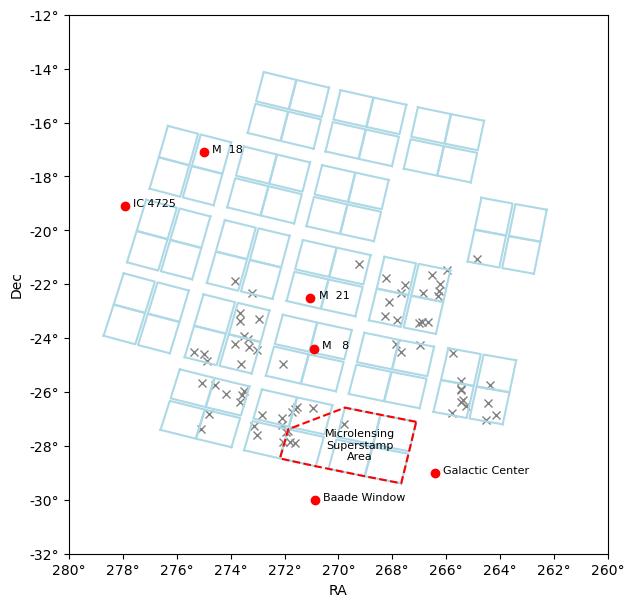

In [ ]:
# K2-C9 Footprint 
# like https://keplergo.github.io/KeplerScienceWebsite/images/k2/k2-c09-field.png, 
# from https://keplergo.github.io/KeplerScienceWebsite/k2-fields.html

footprint_dictionary = json.load(open("./Data/k2-footprint.json"))

# plot srtuff
plt.close(10)
plt.figure(num=10, figsize=(7, 7))

# K2 Footprint
channels = footprint_dictionary["c9"]["channels"]
for c in channels.keys():
    channel = channels[c]
    plt.plot(channel["corners_ra"] + channel["corners_ra"][:1],
             channel["corners_dec"] + channel["corners_dec"][:1], color='lightblue')

# Other k2 details
start_date = footprint_dictionary["c9"]["start"]
stop_date = footprint_dictionary["c9"]["stop"]
field_features = footprint_dictionary["c9"]["comments"]
field_features = field_features.split(",")
for feature in field_features:
    if feature[0] == " ":  # remove leading space
        feature = feature[1:]
print('Field features:', field_features)

# Query Simbad for valid features
# Collect results in a list
table_list = []

for feature in field_features:
    result_table = Simbad.query_object(feature)
    if result_table is not None:
        table_list.append(result_table)

# Stack all individual tables into one big table
if table_list:
    # turned off Astropy warnings because of this merge
    combined_table = vstack(table_list)
    print(combined_table.pformat_all())
else:
    print("No valid Simbad results found.")

######################
# Your code goes here

######################

# Plot stuff
plt.plot(ss_ra, ss_dec, color='red', linestyle='dashed')
plt.text(np.mean(ss_ra), np.mean(ss_dec)-0.5, "Microlensing\nSuperstamp\nArea", fontsize=8, ha="center", color="black")
#print(tap_table.colnames)
plt.plot(tap_table["RAJ2000"], tap_table["DEJ2000"], 'x', color='grey', label="TAP Objects", zorder=1)

# flip the x-axis
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(xlim[::-1])
ax.set_ylim(ylim)

# Customize tick labels
xticklims = [np.floor(xlim[0]/2)*2, np.ceil(xlim[1]/2)*2]  # Round to nearest even number
yticklims = [np.floor(ylim[0]/2)*2, np.ceil(ylim[1]/2)*2]
xticks = np.linspace(xticklims[0], xticklims[1], int((xticklims[1] - xticklims[0])/2 + 1), dtype=int)
yticks = np.linspace(yticklims[0], yticklims[1], int((yticklims[1] - yticklims[0])/2 + 1), dtype=int)
xtick_labels = [f"{tick}°" for tick in xticks]  # Add degree symbol to labels
ytick_labels = [f"{tick}°" for tick in yticks]
plt.xticks(xticks, xtick_labels)
plt.yticks(yticks, ytick_labels)

plt.ylabel('Dec')
plt.xlabel('RA')
ax.set_aspect('equal')
plt.show()

## 3. Future microlensing (space-telescope surveys)

Ground-based observations are limited by weather, seeing, and systematic errors. These factors make the detection of sub-Earth-mass planets from ground-based observatories very challenging. Space-based microlensing surveys will have the advantages of being able to choose an orbit that allows for continuous monitoring of the Galactic bulge, as well as a predicted resolution that would allow for the detection of much smaller planets, and the observation of almost all solar-type lens stars [(Bennett & Rhie, 2002)](https://ui.adsabs.harvard.edu/abs/2002ApJ...574..985B/abstract).<sup>\*<sub>7</sub></sup> [Bennett, Anderson & Gaudi (2007)](https://ui.adsabs.harvard.edu/abs/2007ApJ...660..781B/abstract) propose that the most significant difference, driving the need for space-based rather than ground-based surveys, is the ability to clearly identify light from lens stars, due to the high spatial resolution attainable in space. This identification is useful because it would allow for estimates of the lens masses in most detections, reducing the reliance on Galactic model inference and allowing for a clearer understanding of population statistics. It is worth noting that this will specifically not be the case for FFPs and BD hosts, for which population level statistics are most under sampled.

> <sup>\*<sub>7</sub></sup> Here, a solar-type star refers to stars with spectral type F, G, or K.
        	
The mission requirements for a space-based microlensing survey overlap greatly with other science cases, such as a dark energy survey or a wide-field IR survey.  The crossover benefits of these already individually compelling science cases led to the inception of the joint mission: Wide-Field Infra-Red Survey Telescope (WFIRST; [Green et al., 2011](https://ui.adsabs.harvard.edu/abs/2012arXiv1208.4012G/abstract)), renamed the Nancy Grace Roman Space Telescope (NGRST, AKA Roman).
        	
NGRST was designed to answer key scientific questions about dark energy, exoplanets, and infra-red astrophysics.  In terms of exoplanets, NGRST is considered a complementary survey to the short-period-sensitive *Kepler* survey [(Bennett et al., 2018)](https://ui.adsabs.harvard.edu/abs/2018arXiv1803.08564B/abstract).  Due to the nature of transit surveys, *Kepler* was sensitive to masses of $M\gtrsim M_{\rm Earth}$ and separations of $s \lesssim 1\,{\rm au}$ [(Burke et al., 2015)](https://ui.adsabs.harvard.edu/abs/2015ApJ...809....8B/abstract).  However, the NGRST survey is expected to be sensitive down to very-low-mass planets\footnote{The WFIRST-AFTA (Astrophysics Focused Telescope Asset; [Spergel et al., 2015](https://ui.adsabs.harvard.edu/abs/2015arXiv1503.03757S/abstract)) simulations in [Bennett et al. (2018)](https://ui.adsabs.harvard.edu/abs/2018arXiv1803.08564B/abstract), with aperture size of $2.4\,{\rm m}$, shows an expected sensitivity down to 2 lunar-masses, in some cases.} and, because it will be capitalising on microlensing events, it will be uniquely capable of detecting FFPs and sensitive to orbits beyond the snow line [(Gaudi, 2012)](https://ui.adsabs.harvard.edu/abs/2012ARA%26A..50..411G/abstract).  NGRST is therefore an important mission for building the representative census of exoplanets needed to understand planetary formation and habitability.

The microlensing events detected by NGRST will measure masses more directly by combining measurements of relative proper motion and partial microlensing parallax [(Gould & Yee, 2014)](https://ui.adsabs.harvard.edu/abs/2014ApJ...784...64G/abstract), for those events with luminous lens stars.

For those events where the lens is not bright enough to obtain proper motion ($\mu_{\rm rel}$) measurements, and hence a complete physical solution, augmenting the NGRST microlensing survey with ground-based observations will still be useful.  The utilisation of both ground-based and space-based observations means Earth-space parallax measurements can be obtained for all events with caustic crossings and a large portion of FFPs [(Zhu & Gould, 2016)](https://ui.adsabs.harvard.edu/abs/2016JKAS...49...93Z/abstract). The result of these Earth-space parallax measurements is a complete lens solution. This new observing praxis will come with its own unique sensitivity profile. 

The third-generation of microlensing will be dominated by the space-based survey with complete solutions mostly being obtained by lens proper motion measurements and flux characterisations, made possible by the resolution gains of space-based observations. However, this survey cannot exist in a bubble.  It will still rely on (in some cases) or be improved by supplementary information gleaned from the continuation and incorporation of ground-based surveys such as KMTNet and astrometric follow-up from telescopes such as LSST [(Jain et al., 2015)](https://ui.adsabs.harvard.edu/abs/2015arXiv1501.07897J/abstract).
        
The sheer volume of data expected from this era of microlensing has put pressure on current researchers to find the most efficient and effective means of processing microlensing data. A thorough understanding of common degeneracies, data systematics and biases, and physical inferences is required to avoid analysis and interpretation pitfalls and to overall speed up the analysis process. 

## Next steps

Here is a list of notebooks that you might like to consider tackling next:
* [Single Lenses](SingleLens.ipynb),
* [Modelling](Modelling.ipynb), or
* [Photometry](Photometry.ipynb) (in preperation).
